# Observed Trends
1) The max temperature occurs near the equator. When the latitude increases northwards, the max temperature drops. 

2) Humidity and cloudiness are unlikely related to latitude since they are mostly distrbuted in areas rater evenly

3) The majority of cities have a windspeed under 20 mph. 

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as request
import time
import random
from citipy import citipy
from api_keys import api_key
#set style for plots
plt.style.use('fivethirtyeight')


# Sample Extraction

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

628

In [3]:
#Extracting sample cities
sampled_cities = pd.DataFrame(cities)
sampled_cities = sampled_cities.reset_index(drop = True)
sampled_cities.columns = ["City"]
sampled_cities.index += 1 
sampled_cities["Lat"] = ""
sampled_cities["Lng"] = ""
sampled_cities["Country"] = ""
sampled_cities["Date"] = ""
sampled_cities["Max Temp"] = ""
sampled_cities["Humidity"] = ""
sampled_cities["Cloudiness"] = ""
sampled_cities["Wind Speed"] = ""
sampled_cities.head()

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,punta arenas,,,,,,,,
2,finschhafen,,,,,,,,
3,kununurra,,,,,,,,
4,taolanaro,,,,,,,,
5,mar del plata,,,,,,,,


# OpenWeatherMap API Weather Check

In [4]:
count = 0
units = "Imperial"
print("API Call in Process")
print("-------------------------------")
for index, row in sampled_cities.iterrows():
    city_name = row["City"]
    city_url_name = city_name.replace(" ", "%20")
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, api_key, city_url_name)
    try:
        city_weather = request.get(target_url).json()
        sampled_cities.set_value(index,"Lat",city_weather.get("coord",{}).get("lat"))
        sampled_cities.set_value(index,"Lng",city_weather.get("coord",{}).get("lon"))
        sampled_cities.set_value(index,"Country",city_weather.get("sys",{}).get("country"))
        sampled_cities.set_value(index,"Date",city_weather.get("dt",{}))
        sampled_cities.set_value(index,"Max Temp",city_weather.get("main",{}).get("temp_max"))
        sampled_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
        sampled_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))
        sampled_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
        sampled_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
        print("Processing Call " + str(index) + " of " + str(len(cities)) + "| " + str(city_name))
        print_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, "api_id", city_url_name)
        print(print_url)


    except:
        print(f"No data for this city: {row['City']}")
    print("-------------------------------")
    print("API Call Complete")
    print("-------------------------------")

API Call in Process
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=punta%20arenas


C:\Users\vasqu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\vasqu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\vasqu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\vasqu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\vasqu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launc

Processing Call 1 of 628| punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=punta%20arenas
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=finschhafen
Processing Call 2 of 628| finschhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=finschhafen
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=kununurra
Processing Call 3 of 628| kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kununurra
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=taolanaro
Processing Call 4 of 628| taolan

Processing Call 27 of 628| broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=broken%20hill
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=tuktoyaktuk
Processing Call 28 of 628| tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tuktoyaktuk
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=rikitea
Processing Call 29 of 628| rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=rikitea
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=barentsburg
Processing Call 30 of 628| barentsb

Processing Call 53 of 628| clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=clyde%20river
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=georgetown
Processing Call 54 of 628| georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=georgetown
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=baruun-urt
Processing Call 55 of 628| baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=baruun-urt
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=rehoboth
Processing Call 56 of 628| rehob

Processing Call 79 of 628| kisangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kisangani
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=itoman
Processing Call 80 of 628| itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=itoman
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=hambantota
Processing Call 81 of 628| hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hambantota
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=chokurdakh
Processing Call 82 of 628| chokurdakh
http://api

Processing Call 105 of 628| carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=carutapera
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=san%20jeronimo
Processing Call 106 of 628| san jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=san%20jeronimo
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=ugoofaaru
Processing Call 107 of 628| ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ugoofaaru
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=namibe
Processing Call 108 of 628| 

Processing Call 131 of 628| boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=boende
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=samusu
Processing Call 132 of 628| samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=samusu
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=cherskiy
Processing Call 133 of 628| cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cherskiy
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=dali
Processing Call 134 of 628| dali
http://api.openweathermap.org/

Processing Call 157 of 628| bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bubaque
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=businga
Processing Call 158 of 628| businga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=businga
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=cidreira
Processing Call 159 of 628| cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cidreira
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=scottsburgh
Processing Call 160 of 628| scottsburgh
http://api.

Processing Call 183 of 628| umm kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=umm%20kaddadah
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=abu%20samrah
Processing Call 184 of 628| abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=abu%20samrah
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=cam%20pha
Processing Call 185 of 628| cam pha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cam%20pha
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=constitucion
Processing Call 186 of 6

Processing Call 209 of 628| tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tsiroanomandidy
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=kundiawa
Processing Call 210 of 628| kundiawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kundiawa
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=santa%20eulalia%20del%20rio
Processing Call 211 of 628| santa eulalia del rio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=santa%20eulalia%20del%20rio
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f3

Processing Call 236 of 628| belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=belushya%20guba
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=porbandar
Processing Call 237 of 628| porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=porbandar
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=lata
Processing Call 238 of 628| lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lata
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=mwinilunga
Processing Call 239 of 628| mwinilunga
http:

Processing Call 262 of 628| norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=norman%20wells
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=alyangula
Processing Call 263 of 628| alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=alyangula
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=chapais
Processing Call 264 of 628| chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=chapais
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=tlahualilo
Processing Call 265 of 628| tlahualil

Processing Call 288 of 628| lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lerwick
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=narsaq
Processing Call 289 of 628| narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=narsaq
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=pinillos
Processing Call 290 of 628| pinillos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=pinillos
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=vaitape
Processing Call 291 of 628| vaitape
http://api.openweather

Processing Call 315 of 628| mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mount%20gambier
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=sambava
Processing Call 316 of 628| sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sambava
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=ilebo
Processing Call 317 of 628| ilebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ilebo
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=wuhan
Processing Call 318 of 628| wuhan
http://api.openwea

Processing Call 342 of 628| basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=basco
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=tenenkou
Processing Call 343 of 628| tenenkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tenenkou
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=komsomolskiy
Processing Call 344 of 628| komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=komsomolskiy
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=torrington
Processing Call 345 of 628| torrington
ht

Processing Call 368 of 628| karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=karratha
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=glotovka
Processing Call 369 of 628| glotovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=glotovka
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=vaitupu
Processing Call 370 of 628| vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=vaitupu
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=nhulunbuy
Processing Call 371 of 628| nhulunbuy
http://api.op

Processing Call 394 of 628| port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=port%20augusta
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=nguiu
Processing Call 395 of 628| nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nguiu
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=gambiran
Processing Call 396 of 628| gambiran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=gambiran
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=santa%20engracia
Processing Call 397 of 628| santa engrac

Processing Call 420 of 628| mazamet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mazamet
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=ilulissat
Processing Call 421 of 628| ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ilulissat
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=san%20rafael
Processing Call 422 of 628| san rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=san%20rafael
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=qiongshan
Processing Call 423 of 628| qiongshan

Processing Call 446 of 628| brooks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=brooks
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=tongzhou
Processing Call 447 of 628| tongzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tongzhou
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=sar-e%20pul
Processing Call 448 of 628| sar-e pul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sar-e%20pul
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=sishui
Processing Call 449 of 628| sishui
http://api.op

Processing Call 472 of 628| lahaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lahaina
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=beringovskiy
Processing Call 473 of 628| beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=beringovskiy
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=fairbanks
Processing Call 474 of 628| fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=fairbanks
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=okato
Processing Call 475 of 628| okato
http:

Processing Call 498 of 628| suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=suntar
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=sakrand
Processing Call 499 of 628| sakrand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sakrand
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=khovu-aksy
Processing Call 500 of 628| khovu-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=khovu-aksy
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=nome
Processing Call 501 of 628| nome
http://api.openweathe

Processing Call 525 of 628| srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=srednekolymsk
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=colesberg
Processing Call 526 of 628| colesberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=colesberg
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=batemans%20bay
Processing Call 527 of 628| batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=batemans%20bay
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=papara
Processing Call 528 of

Processing Call 551 of 628| sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sao%20paulo%20de%20olivenca
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=sokol
Processing Call 552 of 628| sokol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sokol
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=garowe
Processing Call 553 of 628| garowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=garowe
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=los%20llanos%20de%20aridane
Processing Ca

Processing Call 578 of 628| saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=saint-pierre
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=behshahr
Processing Call 579 of 628| behshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=behshahr
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=tezontepec
Processing Call 580 of 628| tezontepec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tezontepec
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=petropavlovsk-kamchatskiy
Processing Call 58

Processing Call 604 of 628| carman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=carman
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=palm%20beach
Processing Call 605 of 628| palm beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=palm%20beach
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=khor
Processing Call 606 of 628| khor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=khor
-------------------------------
API Call Complete
-------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6189aa5f5dbc2764307b399db8f34fb2&q=zhanatas
Processing Call 607 of 628| zhanatas
http://api.openwea

In [5]:
#Clean up & save as CSV file
sampled_cities = sampled_cities.dropna()
sampled_cities.to_csv("weatherpy_data.csv")
sampled_cities.count(axis = 0)

City          562
Lat           562
Lng           562
Country       562
Date          562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
dtype: int64

In [6]:
sampled_cities = sampled_cities[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].astype('Float64')
sampled_cities.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,-53.16,-70.91,46.40,65.0,75.0,29.97
2,-6.60,147.85,77.85,93.0,80.0,2.53
3,-15.77,128.74,89.60,59.0,12.0,5.82
5,-46.43,-67.52,55.98,48.0,0.0,5.99
6,21.35,-158.09,78.08,71.0,75.0,6.93


# Latitude vs Temperature Plot

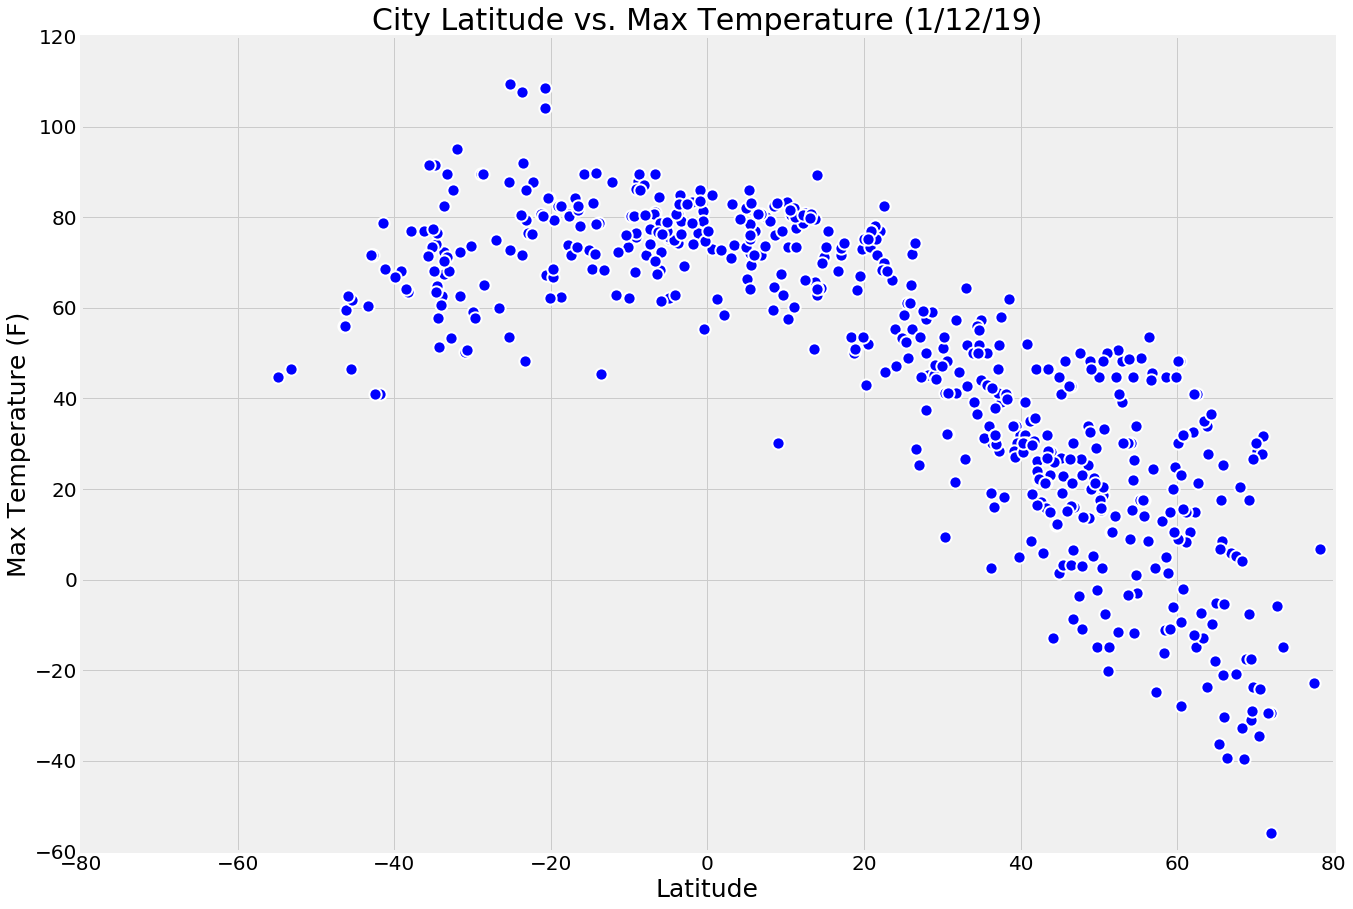

In [14]:
sampled_cities.plot(kind="scatter", x="Lat", y="Max Temp",
                    grid=True, color="blue", edgecolor = "white", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Max Temperature (1/12/19)', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_temp')
plt.show()

# Latitude vs. Humidity Plot

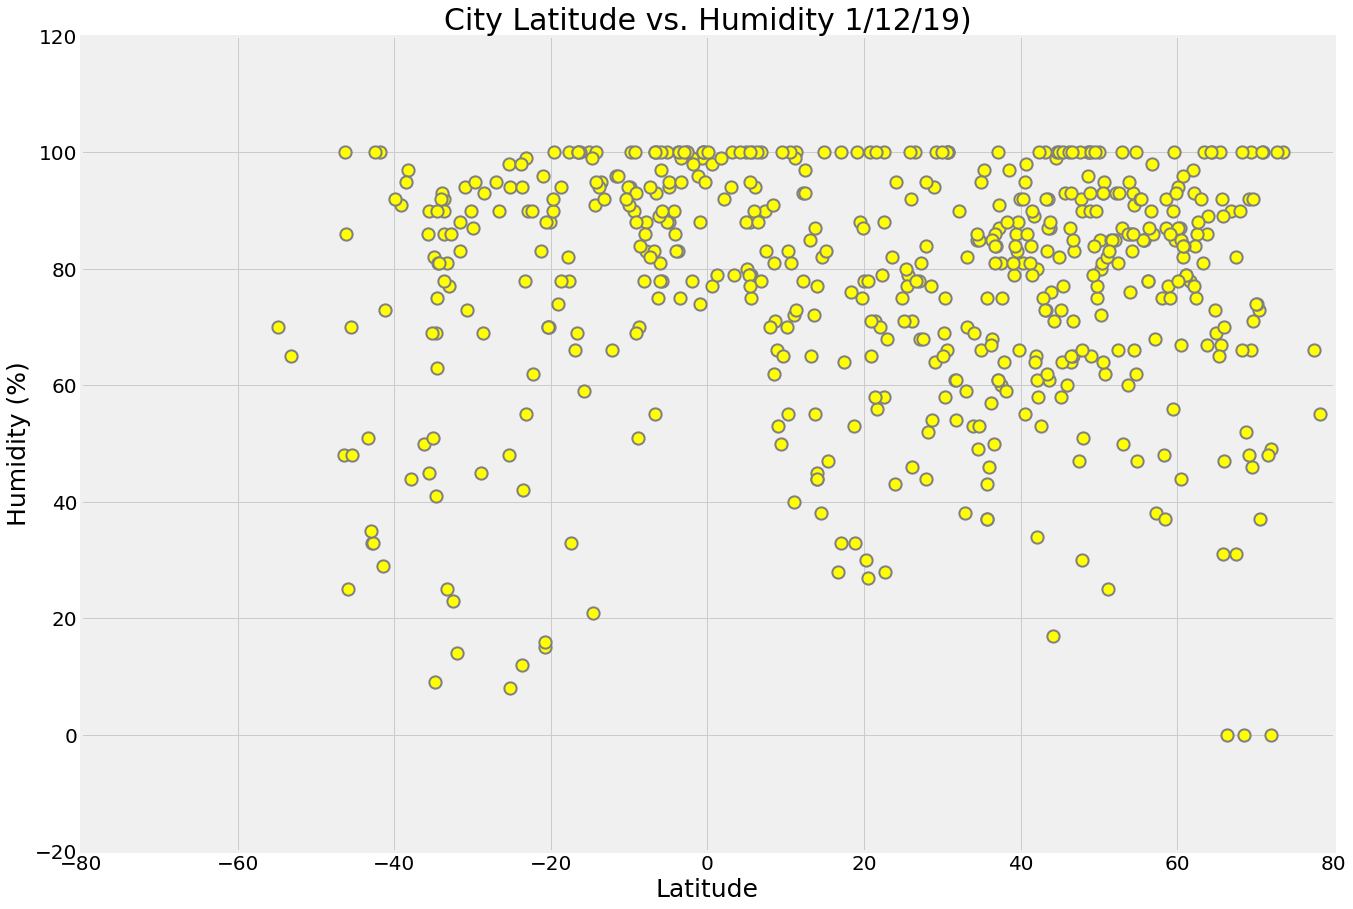

In [15]:
sampled_cities.plot(kind="scatter",x="Lat",y="Humidity",
                    grid=True, color="yellow", edgecolor = "grey", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity 1/12/19)', fontsize = 30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_humidity')
plt.show()

# Latitude vs. Cloudiness Plot

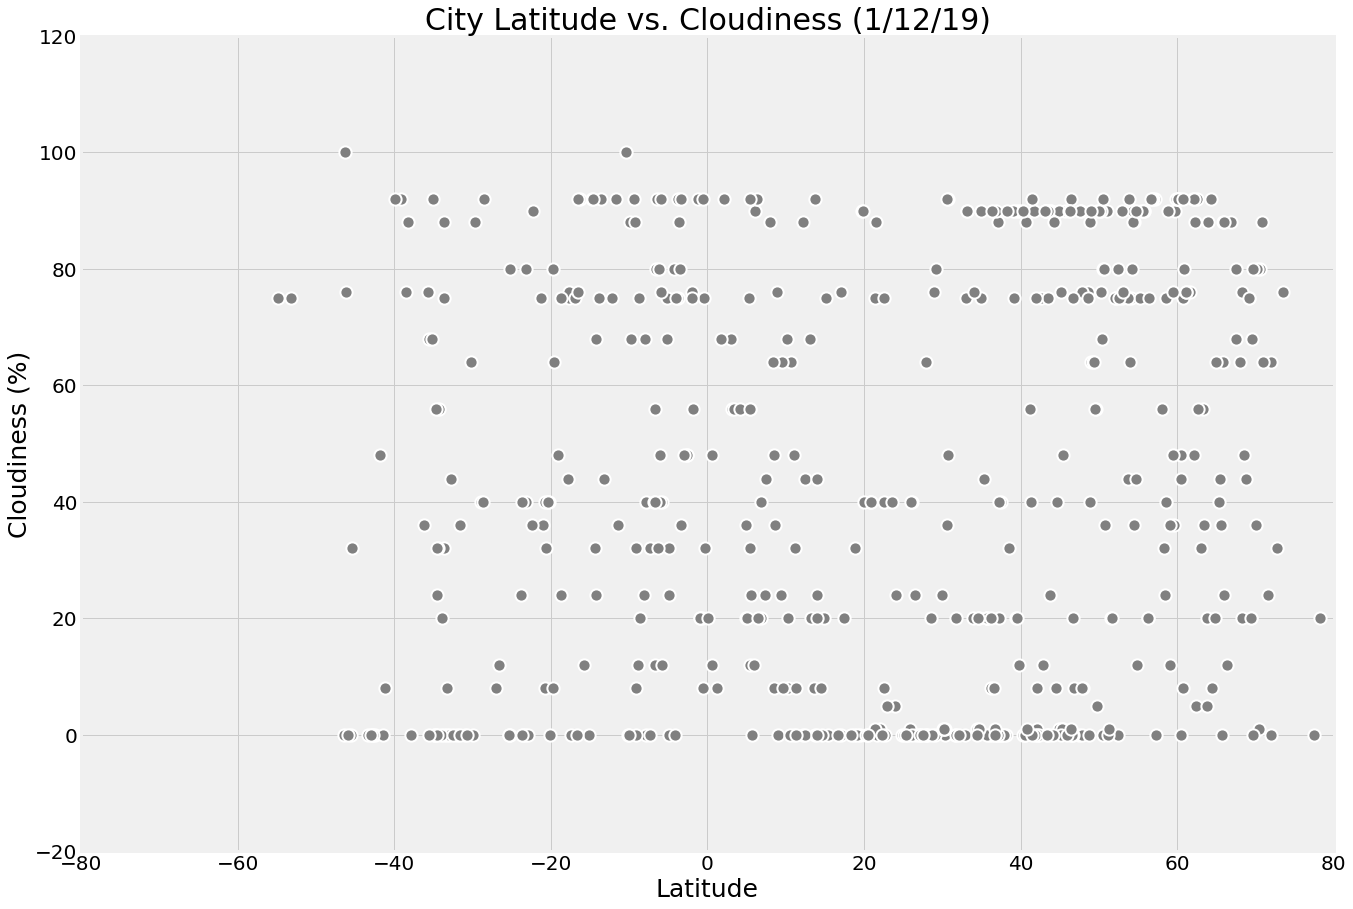

In [13]:
sampled_cities.plot(kind="scatter",x="Lat",y="Cloudiness",
                    grid=True, color="grey", edgecolor = "white", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness (1/12/19)', fontsize = 30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_cloudiness')
plt.show()

# Latitude vs. Wind Speed Plot

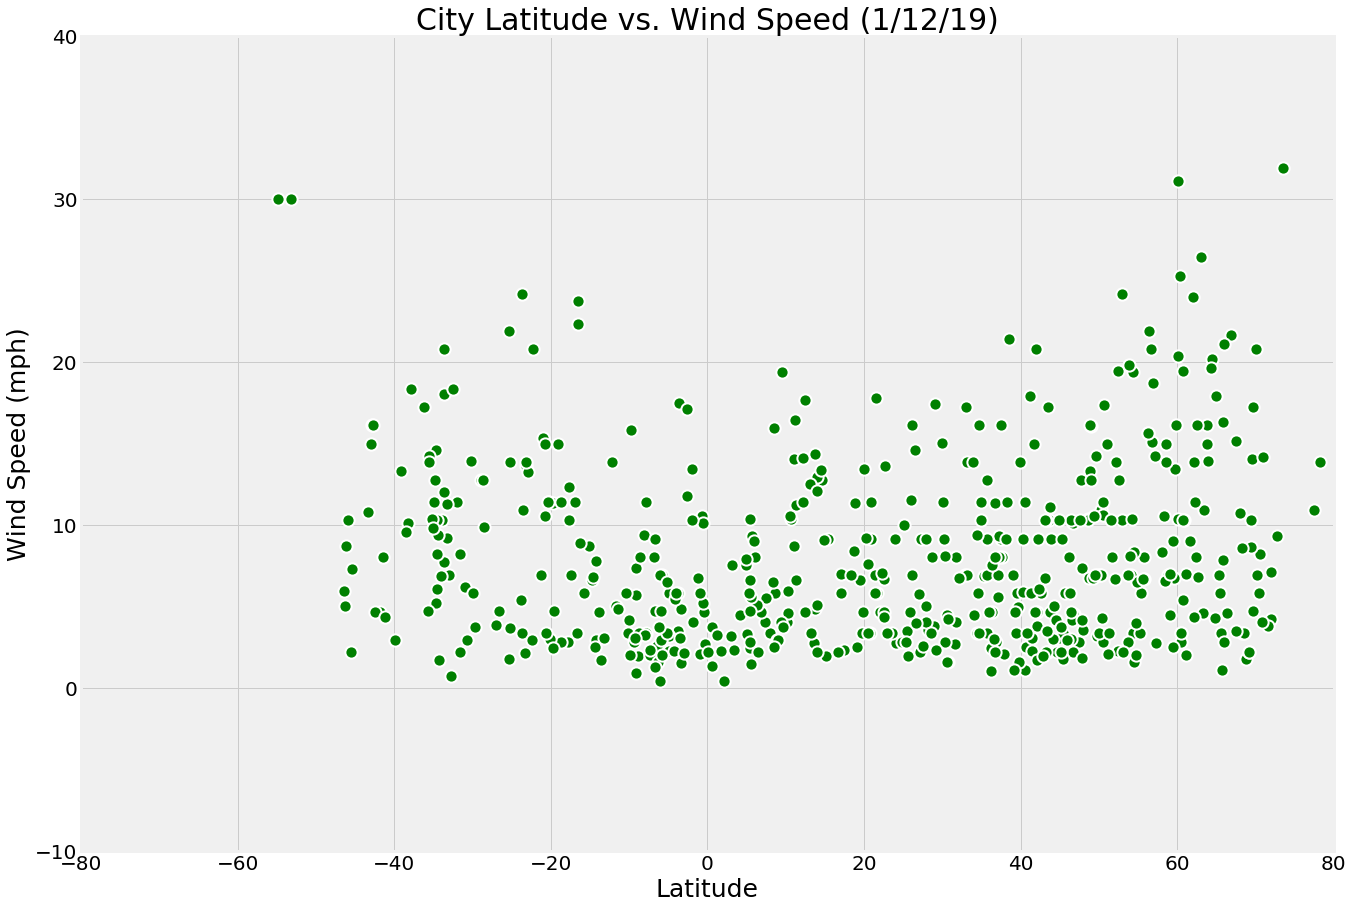

In [16]:
sampled_cities.plot(kind="scatter",x="Lat",y="Wind Speed",
                    grid=True, color="green", edgecolor = "white", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed (1/12/19)', fontsize = 30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-10, 40)
plt.tick_params(labelsize=20)
plt.savefig('latitude_windspeed')
plt.show()